In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pl

paths = pd.read_csv('Z:/All-Rats/Billel/session_indexing.csv',sep = ';')['Path']

# Visualizing ES

In [10]:
# getting the ES for all recording sessions
longlong=[]
longpaths=[]
life=[]
for i in paths:
    try:
        long_sleeps_pre, path_preR=pl.removing_short_sessions(i, pre_RUN=True,min_dur=30, path_list=True)
        path_pre = ["PRE " + p[-11:-1] for p in path_preR]
        long_sleeps_post, path_postR=pl.removing_short_sessions(i, pre_RUN=False,min_dur=30, path_list=True)
        path_post = ["POST " + p[-11:-1] for p in path_postR]
        long_sleeps=np.concatenate((long_sleeps_pre,long_sleeps_post))
        paths_all=path_pre+path_post
        longlong.extend(long_sleeps)
        longpaths.extend(paths_all)
    except:
        life.append(i)  #find out more about excluded sessions and reasons why in Methodology file

Rat : 8 on day : 1
Working with session Rat08-20130708 @ Z:\Rat08\Rat08-20130708
Rat : 8 on day : 1
Working with session Rat08-20130708 @ Z:\Rat08\Rat08-20130708
Rat : 8 on day : 2
Working with session Rat08-20130709 @ Z:\Rat08\Rat08-20130709
Rat : 8 on day : 2
Working with session Rat08-20130709 @ Z:\Rat08\Rat08-20130709
Rat : 8 on day : 3
Working with session Rat08-20130710 @ Z:\Rat08\Rat08-20130710
Rat : 8 on day : 3
Working with session Rat08-20130710 @ Z:\Rat08\Rat08-20130710
Rat : 8 on day : 4
Working with session Rat08-20130711 @ Z:\Rat08\Rat08-20130711
Rat : 8 on day : 4
Working with session Rat08-20130711 @ Z:\Rat08\Rat08-20130711
Rat : 8 on day : 5
Working with session Rat08-20130712 @ Z:\Rat08\Rat08-20130712
Rat : 8 on day : 5
Working with session Rat08-20130712 @ Z:\Rat08\Rat08-20130712
Rat : 8 on day : 6
Working with session Rat08-20130713 @ Z:\Rat08\Rat08-20130713
Rat : 8 on day : 6
Working with session Rat08-20130713 @ Z:\Rat08\Rat08-20130713
Rat : 8 on day : 7
Working w

Rat : 11 on day : 16
Working with session Rat11-20150327 @ Z:\Rat11\Rat11-20150327
Rat : 11 on day : 16
Working with session Rat11-20150327 @ Z:\Rat11\Rat11-20150327
Rat : 11 on day : 17
Working with session Rat11-20150328 @ Z:\Rat11\Rat11-20150328
Rat : 11 on day : 17
Working with session Rat11-20150328 @ Z:\Rat11\Rat11-20150328
Rat : 11 on day : 18
Working with session Rat11-20150330 @ Z:\Rat11\Rat11-20150330
Rat : 11 on day : 18
Working with session Rat11-20150330 @ Z:\Rat11\Rat11-20150330
Rat : 11 on day : 19
Working with session Rat11-20150331 @ Z:\Rat11\Rat11-20150331
Rat : 11 on day : 19
Working with session Rat11-20150331 @ Z:\Rat11\Rat11-20150331
Rat : 11 on day : 20
Working with session Rat11-20150401 @ Z:\Rat11\Rat11-20150401
Rat : 11 on day : 20
Working with session Rat11-20150401 @ Z:\Rat11\Rat11-20150401
Rat : 11 on day : 21
Working with session Rat11-20150402 @ Z:\Rat11\Rat11-20150402
Rat : 11 on day : 22
Working with session Rat11-20150403 @ Z:\Rat11\Rat11-20150403


In [11]:
# checking that all epochs identified are consecutive without any time gaps
for i in range(len(longlong)):
    dur=longlong[i][0]['stop']/60e6-longlong[i][0]['start']/60e6
    start=(longlong[i][0]['start']-longlong[i][0]['start'].iloc[0])/60e6  # subtracting start time so it starts from 0
    start=start.tolist()
    couples=list(zip(start, dur))
    for i in range(1,len(couples)):
        if couples[i][0]-couples[i-1][1]==couples[i-1][0]:
            print('there\'s a prob friend')

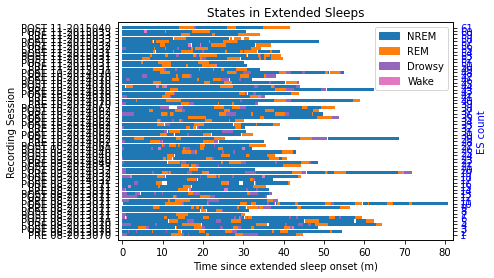

In [12]:
# bar plot

colors = {'nrem':'tab:blue', 'drowsy':'tab:purple', 'rem':'tab:orange',  'wake':'tab:pink'}
fig, ax = plt.subplots()


y_pos=np.arange(0.5,len(longpaths)+0.5)
ax.set_ylim(-1,len(longpaths)+1)
ax.set_xlim(-1,82)
ax.set_yticks(y_pos)
ax.set_yticklabels(longpaths)
ax.set_ylabel('Recording Session')
ax2 = ax.twinx()
ax2.set_ylim(-1,len(longpaths)+1)
ax2.set_yticks(y_pos)
ax2_labels=np.arange(1, len(longpaths)+1)
ax2.set_yticklabels(ax2_labels, color='b')
ax2.set_ylabel('ES count', color='b')

ax.set_title('States in Extended Sleeps')
ax.set_xlabel('Time since extended sleep onset (m)')

for i in range(len(longlong)):
    dur=longlong[i][0]['stop']/60e6-longlong[i][0]['start']/60e6
    start=(longlong[i][0]['start']-longlong[i][0]['start'].iloc[0])/60e6  # subtracting start time so it starts from 0
    start=start.tolist()
    couples=list(zip(start, dur))
    
    coloring=[]
    for c in range(len(longlong[i][0])):   # the [0] is to get the pd.array instead of the np.ndarray
        g=colors[longlong[i][0]['state'].iloc[c]]
        coloring.append(g)  
    
    ax.broken_barh(couples, (i, 0.9), facecolors=coloring)

# adding the legend
pop_a = mpatches.Patch(color='tab:blue', label='NREM')
pop_b = mpatches.Patch(color='tab:orange', label='REM')
pop_c = mpatches.Patch(color='tab:purple', label='Drowsy')
pop_d = mpatches.Patch(color='tab:pink', label='Wake')

plt.legend(handles=[pop_a,pop_b, pop_c, pop_d])